In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2

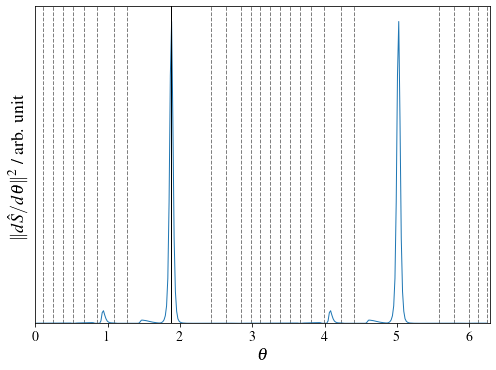

In [3]:
import utils
from utils.corner2d_new import (
    plot_theories_zspectral, annotate_theories_zspectral,
    get_pn_label_from_ppe_index,
)

plt.style.use('publication.mplstyle')
fig = plt.figure(figsize=(
        utils.TEXT_WIDTH_PRD_DOUBLE,
        utils.TEXT_WIDTH_PRD_DOUBLE*0.75))
ax = fig.subplots()

theory_angles = pd.read_csv("../data/theory_angles.csv", index_col=0)
plot_theories_zspectral(
        theory_angles['z_theta'].values, 
        ax=ax, color='gray', linestyle='dashed')
plot_theories_zspectral(
        np.mod(theory_angles['z_theta'].values+np.pi, np.pi*2), 
        ax=ax, color='gray', linestyle='dashed')

phi_hat = np.load("../data/phihat_sample.npy")
dphi_hat = phi_hat[2:] - phi_hat[:-2]
dphi_hat = np.sum(dphi_hat*dphi_hat, axis=-1)
z_theta = np.linspace(0, 2*np.pi, len(phi_hat), endpoint=False)
z_theta = z_theta[1:-1]
ax.plot(z_theta, dphi_hat)
ax.axvline(1.8774, c='black', linestyle='solid')

ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$|\!|d\hat{S}/d\theta|\!|^2$ / arb. unit')
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(0, None)
ax.set_yticks([])

fig.tight_layout()
fig.savefig('./angle_ref.pdf')

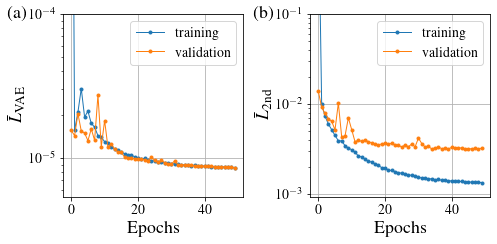

In [6]:
import utils

plt.style.use('publication.mplstyle')
fig = plt.figure(figsize=(
        utils.TEXT_WIDTH_PRD_DOUBLE,
        utils.TEXT_WIDTH_PRD_DOUBLE*0.5))
axes = fig.subplots(1, 2)

markersize = 3.

epochs = 50
df_loss_train = pd.read_csv("../data/tensorboard_records/run-tensorboard_03_round1-tag-loss_train.csv")
df_loss_val = pd.read_csv("../data/tensorboard_records/run-tensorboard_03_round1-tag-loss_val.csv")

ax = axes[0]
ax.plot(df_loss_train['Value'][:epochs].values, marker='o', markersize=markersize, label='training')
ax.plot(df_loss_val['Value'][:epochs].values, marker='o', markersize=markersize, label='validation')
ax.set_yscale('log')
ax.set_ylim(None, 1e-4)
ax.set_xlabel('Epochs')
ax.set_ylabel(r'$\bar{L}_\mathrm{VAE}$')
ax.grid()
ax.legend(fontsize=14)

ax = axes[1]
ax.plot(df_loss_train['Value'][epochs:].values, marker='o', markersize=markersize, label='training')
ax.plot(df_loss_val['Value'][epochs:].values, marker='o', markersize=markersize, label='validation')
ax.set_yscale('log')
ax.set_ylim(None, 1e-1)
ax.set_xlabel('Epochs')
ax.set_ylabel(r'$\bar{L}_\mathrm{2nd}$')
ax.grid()
ax.legend(fontsize=14)

axes_to_label = axes.flat
axes_label_pos = [(-0.2,1.04)] * len(axes_to_label)
for i,(ax,pos) in enumerate(zip(axes_to_label, axes_label_pos)):
    axlabel = f'({chr(97+i)})'
    ax.text(pos[0], pos[1], axlabel, 
            transform=ax.transAxes, 
            fontweight='bold', fontsize=18,
            va='top', ha='right')
    
fig.tight_layout()
fig.savefig('./training_history.pdf')

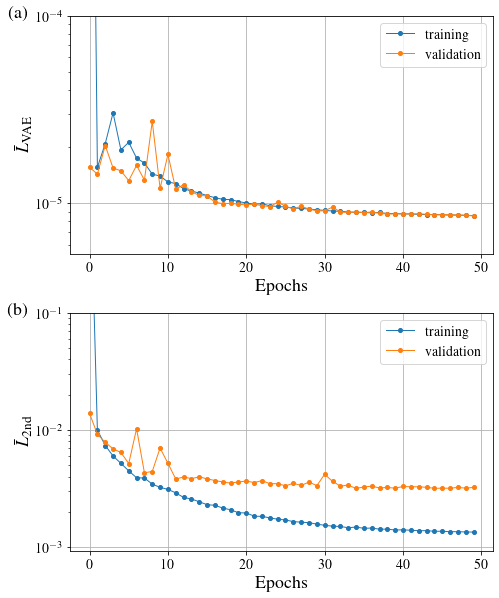

In [6]:
# # fig, axes = plt.subplots(2, 1, figsize=(4,6))
# import utils

# plt.style.use('publication.mplstyle')
# fig = plt.figure(figsize=(
#         utils.TEXT_WIDTH_PRD_DOUBLE,
#         utils.TEXT_WIDTH_PRD_DOUBLE*1.2))
# axes = fig.subplots(2, 1)

# epochs = 50
# df_loss_train = pd.read_csv("../data/tensorboard_records/run-tensorboard_03_round1-tag-loss_train.csv")
# df_loss_val = pd.read_csv("../data/tensorboard_records/run-tensorboard_03_round1-tag-loss_val.csv")

# ax = axes[0]
# ax.plot(df_loss_train['Value'][:epochs].values, marker='o', markersize=4, label='training')
# ax.plot(df_loss_val['Value'][:epochs].values, marker='o', markersize=4, label='validation')
# ax.set_yscale('log')
# ax.set_ylim(None, 1e-4)
# ax.set_xlabel('Epochs')
# ax.set_ylabel(r'$\bar{L}_\mathrm{VAE}$')
# ax.grid()
# ax.legend(fontsize=14)

# ax = axes[1]
# ax.plot(df_loss_train['Value'][epochs:].values, marker='o', markersize=4, label='training')
# ax.plot(df_loss_val['Value'][epochs:].values, marker='o', markersize=4, label='validation')
# ax.set_yscale('log')
# ax.set_ylim(None, 1e-1)
# ax.set_xlabel('Epochs')
# ax.set_ylabel(r'$\bar{L}_\mathrm{2nd}$')
# ax.grid()
# ax.legend(fontsize=14)

# axes_to_label = axes.flat
# axes_label_pos = [(-0.1,1.04)] * len(axes_to_label)
# for i,(ax,pos) in enumerate(zip(axes_to_label, axes_label_pos)):
#     axlabel = f'({chr(97+i)})'
#     ax.text(pos[0], pos[1], axlabel, 
#             transform=ax.transAxes, 
#             fontweight='bold', fontsize=18,
#             va='top', ha='right')
    
# fig.tight_layout()
# fig.savefig('./training_history.pdf')

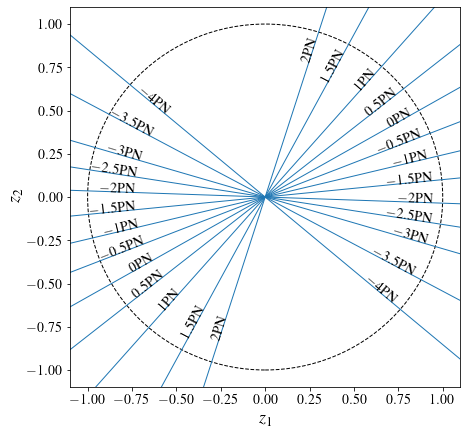

In [55]:
import utils
from utils.corner2d_new import (
    plot_theories_z12, annotate_theories_z12,
    get_pn_label_from_ppe_index,
)

plt.style.use('publication.mplstyle')
fig = plt.figure(figsize=(
        utils.TEXT_WIDTH_PRD_DOUBLE,
        utils.TEXT_WIDTH_PRD_DOUBLE))
ax = fig.subplots()

theory_angles = pd.read_csv("../data/theory_angles.csv", index_col=0)
plot_theories_z12(
        theory_angles['z_theta'].values, 
#         np.tile([-1.,1.], [len(theory_angles),1]),
        ax=ax, color='C0')
annotate_theories_z12(
        theory_angles['z_theta'].values, theory_angles['b'].values, 
        label_transformer=get_pn_label_from_ppe_index,
        ax=ax, anchors=0.73, ha='right', va='baseline',
        fontsize=14)
annotate_theories_z12(
        theory_angles['z_theta'].values, theory_angles['b'].values, 
        label_transformer=get_pn_label_from_ppe_index,
        ax=ax, anchors=-0.95, ha='right', va='baseline',
        fontsize=14)
ax.add_patch(plt.Circle((0.,0.), 1., fill=False, edgecolor='black', linestyle='dashed'))
ax.set_xlabel(r'$z_1$')
ax.set_ylabel(r'$z_2$')
# ax.grid()

fig.savefig('./latent_ppe.pdf')

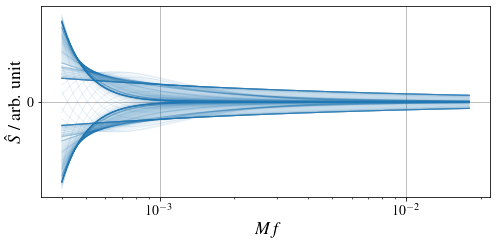

In [29]:
plt.style.use('publication.mplstyle')
fig = plt.figure(figsize=(
        utils.TEXT_WIDTH_PRD_DOUBLE,
        utils.TEXT_WIDTH_PRD_DOUBLE*0.5))
ax = fig.subplots()
# ax = plt.gca()

phi_hat = np.load("../data/phihat_sample.npy")
freqs = np.logspace(np.log10(4e-4), np.log10(1.8e-2), 640)
for p in phi_hat:
    ax.plot(freqs, p, color='C0', alpha=0.1)
ax.set_xscale('log')
ax.set_xlabel(r'$Mf$')
ax.set_ylabel(r'$\hat{S}$ / arb. unit')
ax.set_yticks([0.])
ax.grid()

fig.tight_layout()
fig.savefig('./latent_sample.pdf')

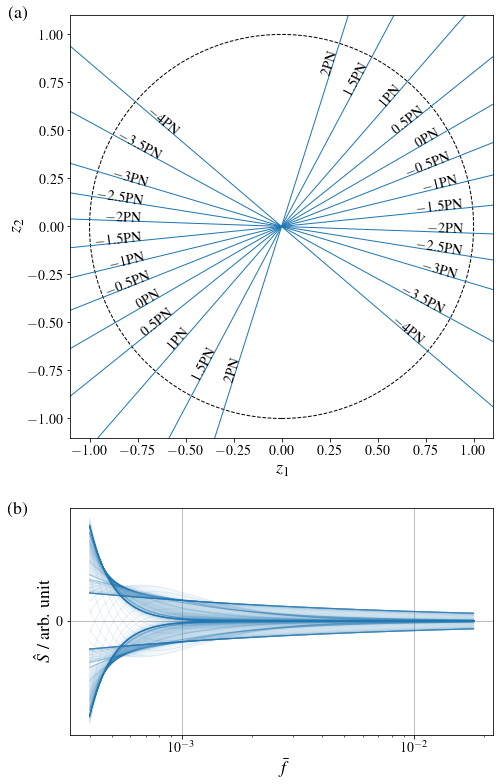

In [12]:
import utils
from utils.corner2d_new import (
    plot_theories_z12, annotate_theories_z12,
    get_pn_label_from_ppe_index,
)

plt.style.use('publication.mplstyle')
fig = plt.figure(figsize=(
        utils.TEXT_WIDTH_PRD_DOUBLE,
        utils.TEXT_WIDTH_PRD_DOUBLE*1.6))
axes = fig.subplots(2, 1, height_ratios=[2.,1.])

ax = axes[0]
theory_angles = pd.read_csv("../data/theory_angles.csv", index_col=0)
plot_theories_z12(
        theory_angles['z_theta'].values, 
#         np.tile([-1.,1.], [len(theory_angles),1]),
        ax=ax, color='C0')
annotate_theories_z12(
        theory_angles['z_theta'].values, theory_angles['b'].values, 
        label_transformer=get_pn_label_from_ppe_index,
        ax=ax, anchors=0.73, ha='right', va='baseline',
        fontsize=14)
annotate_theories_z12(
        theory_angles['z_theta'].values, theory_angles['b'].values, 
        label_transformer=get_pn_label_from_ppe_index,
        ax=ax, anchors=-0.95, ha='right', va='baseline',
        fontsize=14)
ax.add_patch(plt.Circle((0.,0.), 1., fill=False, edgecolor='black', linestyle='dashed'))
ax.set_xlabel(r'$z_1$')
ax.set_ylabel(r'$z_2$')
ax.set_aspect('equal')
# ax.grid()

ax = axes[1]
phi_hat = np.load("../data/phihat_sample.npy")
freqs = np.logspace(np.log10(4e-4), np.log10(1.8e-2), 640)
for p in phi_hat:
    ax.plot(freqs, p, color='C0', alpha=0.1)
ax.set_xscale('log')
ax.set_xlabel(r'$\bar{f}$')
ax.set_ylabel(r'$\hat{S}$ / arb. unit')
ax.set_yticks([0.])
ax.grid()

axes_to_label = axes.flat
axes_label_pos = [(-0.1,1.02)] * len(axes_to_label)
for i,(ax,pos) in enumerate(zip(axes_to_label, axes_label_pos)):
    axlabel = f'({chr(97+i)})'
    ax.text(pos[0], pos[1], axlabel, 
            transform=ax.transAxes, 
            fontweight='bold', fontsize=18,
            va='top', ha='right')
    
fig.tight_layout()

# fig.savefig('./latent_representation.pdf')

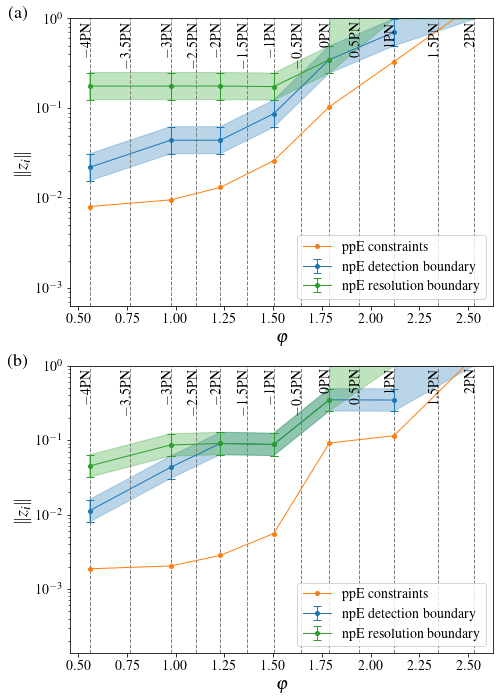

In [42]:
import utils
from utils.corner2d_new import (
    plot_theories_zspectral, annotate_theories_zspectral,
    get_pn_label_from_ppe_index,
)

plt.style.use('publication.mplstyle')
fig = plt.figure(figsize=(
        utils.TEXT_WIDTH_PRD_DOUBLE,
        utils.TEXT_WIDTH_PRD_DOUBLE*1.4))
axes = fig.subplots(2, 1)

theory_angles = pd.read_csv("../data/theory_angles.csv", index_col=0)
for ax in axes:
    plot_theories_zspectral(
            theory_angles['z_ang'].values, 
            ax=ax, color='gray', linestyle='dashed')
    annotate_theories_zspectral(
            theory_angles['z_ang'].values, theory_angles['b'].values, 
            label_transformer=get_pn_label_from_ppe_index,
            ax=ax, anchors=0.9, ha='right', va='baseline', fontsize=14)
    
def plot_boundaries(ax, df):
    x = df['z_ang'].values
    y = df['det_ppe'].values
    ax.plot(x, y, 
            color='C1', marker='o', markersize=4,
            label='ppE constraints')
    y1 = df['det_npe_lower'].values
    y2 = df['det_npe_upper'].values
    y1 = np.where(y1>1., 1., y1)
#     y2 = np.where(np.isnan(y2), 2., y2)
    mask = np.isnan(y2)
    y2[mask] = 1e20
    y = np.sqrt(y1[~mask]*y2[~mask])
    yerr = y-y1[~mask], y2[~mask]-y
    ax.errorbar(x[~mask], y=y, yerr=yerr, 
                color='C0', marker='o', capsize=4, markersize=4,
                label='npE detection boundary')
    ax.fill_between(x, y1, y2, color='C0', alpha=0.3)
    y1 = df['res_npe_lower'].values
    y2 = df['res_npe_upper'].values
    y1 = np.where(y1>1., 1., y1)
    #     y2 = np.where(np.isnan(y2), 2., y2)
    mask = np.isnan(y2)
    y2[mask] = 1e20
    y = np.sqrt(y1[~mask]*y2[~mask])
    yerr = y-y1[~mask], y2[~mask]-y
    ax.errorbar(x[~mask], y=y, yerr=yerr, 
                color='C2', marker='o', capsize=4, markersize=4,
                label='npE resolution boundary')
    ax.fill_between(x, y1, y2, color='C2', alpha=0.3)
    ax.set_yscale('log')
    ax.set_xlabel(r'$\varphi$')
    ax.set_ylabel(r'$|\!|z_i|\!|$')
    ax.set_ylim(None, 1.)
    ax.legend(loc='lower right', fontsize=14)
    return ax

ax = axes[0]
df = pd.read_csv("../data/deviation_boundaries_mtot35.csv", index_col=0)
plot_boundaries(ax, df)

ax = axes[1]
df = pd.read_csv("../data/deviation_boundaries_mtot15.csv", index_col=0)
plot_boundaries(ax, df)

axes_to_label = axes.flat
axes_label_pos = [(-0.1,1.04)] * len(axes_to_label)
for i,(ax,pos) in enumerate(zip(axes_to_label, axes_label_pos)):
    axlabel = f'({chr(97+i)})'
    ax.text(pos[0], pos[1], axlabel, 
            transform=ax.transAxes, 
            fontweight='bold', fontsize=18,
            va='top', ha='right')
    
fig.tight_layout()
# fig.savefig('./deviation_boundaries.pdf')

In [32]:
df = pd.read_csv("../data/latent_pseudo_pn.csv", index_col=0)
df

,z_theta,index_0,index_1_rel,coeff_0,coeff_1_rel
0,0.000000,-8.771041,2.421773,0.000025,-1.540207
1,0.006283,-8.728192,2.412211,0.000025,-1.512956
2,0.012566,-8.684825,2.402535,0.000024,-1.465789
3,0.018850,-8.641067,2.392763,0.000024,-1.406578
4,0.025133,-8.597043,2.382928,0.000024,-1.347936
...,...,...,...,...,...
995,6.251769,-8.980855,2.468502,0.000017,-0.304051
996,6.258053,-8.939506,2.459304,0.000018,-1.398425
997,6.264336,-8.897914,2.450049,0.000020,-1.485638
998,6.270619,-8.855977,2.440712,0.000022,-1.515165


Text(0, 0.5, 'order')

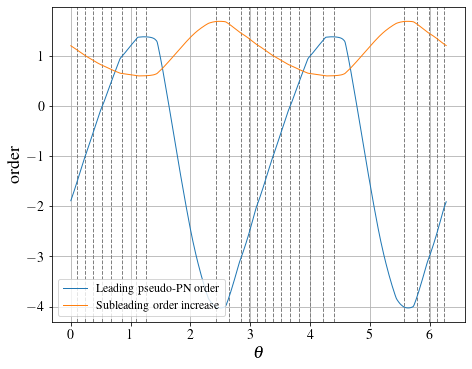

In [33]:
import utils
from utils.corner2d_new import (
    plot_theories_zspectral, annotate_theories_zspectral,
    get_pn_label_from_ppe_index,
)

ax = plt.gca()
theory_angles = pd.read_csv("../data/theory_angles.csv", index_col=0)
plot_theories_zspectral(
        theory_angles['z_theta'].values, 
        ax=ax, color='gray', linestyle='dashed')
plot_theories_zspectral(
        np.mod(theory_angles['z_theta'].values+np.pi, np.pi*2), 
        ax=ax, color='gray', linestyle='dashed')
# annotate_theories_zspectral(
#         theory_angles['z_theta'].values, theory_angles['b'].values, 
#         label_transformer=get_pn_label_from_ppe_index,
#         ax=ax, anchors=0.9, ha='right', va='baseline', fontsize=14)

plt.plot(df['z_theta'], (df['index_0']+5)/2, label='Leading pseudo-PN order')
plt.plot(df['z_theta'], df['index_1_rel']/2, label='Subleading order increase')
plt.legend(loc='lower left')
plt.grid()
plt.xlabel(r'$\theta$')
plt.ylabel('order')

Text(0, 0.5, 'coefficient')

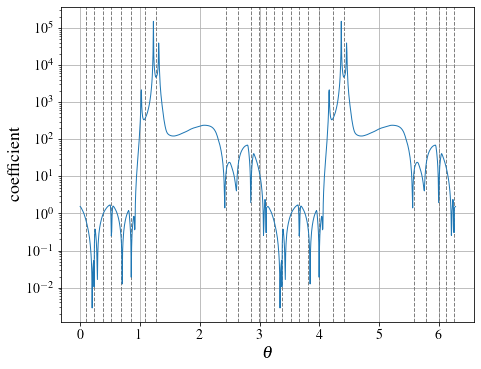

In [34]:
import utils
from utils.corner2d_new import (
    plot_theories_zspectral, annotate_theories_zspectral,
    get_pn_label_from_ppe_index,
)

ax = plt.gca()
theory_angles = pd.read_csv("../data/theory_angles.csv", index_col=0)
plot_theories_zspectral(
        theory_angles['z_theta'].values, 
        ax=ax, color='gray', linestyle='dashed')
plot_theories_zspectral(
        np.mod(theory_angles['z_theta'].values+np.pi, np.pi*2), 
        ax=ax, color='gray', linestyle='dashed')
# annotate_theories_zspectral(
#         theory_angles['z_theta'].values, theory_angles['b'].values, 
#         label_transformer=get_pn_label_from_ppe_index,
#         ax=ax, anchors=0.9, ha='right', va='baseline', fontsize=14)

plt.plot(df['z_theta'], np.abs(df['coeff_1_rel']), label='Relative coefficient')
# plt.legend(loc='lower left')
plt.grid()
# plt.ylim(-50, 50)
plt.yscale('log')
plt.xlabel(r'$\theta$')
plt.ylabel('coefficient')

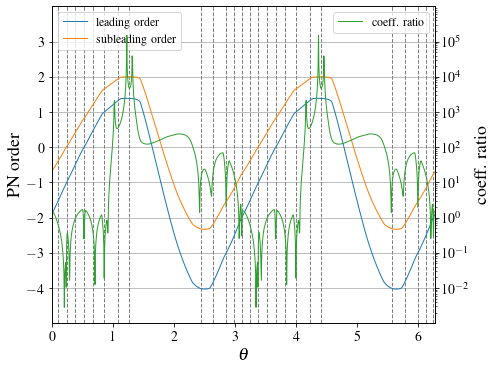

In [35]:
import utils
from utils.corner2d_new import (
    plot_theories_zspectral, annotate_theories_zspectral,
    get_pn_label_from_ppe_index,
)

plt.style.use('publication.mplstyle')
fig = plt.figure(figsize=(
        utils.TEXT_WIDTH_PRD_DOUBLE,
        utils.TEXT_WIDTH_PRD_DOUBLE*0.75))
ax1 = fig.subplots()
ax2 = ax1.twinx()

theory_angles = pd.read_csv("../data/theory_angles.csv", index_col=0)
plot_theories_zspectral(
        theory_angles['z_theta'].values, 
        ax=ax1, color='gray', linestyle='dashed')
plot_theories_zspectral(
        np.mod(theory_angles['z_theta'].values+np.pi, np.pi*2), 
        ax=ax1, color='gray', linestyle='dashed')

ax1.plot(df['z_theta'], (df['index_0']+5)/2, 
         color='C0', linestyle='solid', label='leading order')
ax1.plot(df['z_theta'], (df['index_0']+df['index_1_rel']+5)/2, 
         color='C1', linestyle='solid', label='subleading order')
ax2.plot(df['z_theta'], np.abs(df['coeff_1_rel']), 
         color='C2', linestyle='solid', label='coeff. ratio')
ax2.set_yscale('log')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_xlabel(r'$\theta$')
ax1.set_ylabel('PN order')
ax2.set_ylabel('coeff. ratio')
ax1.set_xlim(0, 2*np.pi)

yticks1 = [-4,-3,-2,-1,0,1,2,3]
yticks2 = [1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5]
ax1.set_yticks(yticks1)
ax2.set_yticks(yticks2)

# dilation = np.log10(yticks2[-1]) - np.log10(yticks2[0]) / (yticks1[-1] - yticks1[0])
ylim1 = (-5, 4)
ylim2 = (1e-3,1e6)
ax1.set_ylim(ylim1)
ax2.set_ylim(ylim2)

ax1.grid(axis='y')

fig.tight_layout()
fig.savefig('./latent_pseudopn.pdf')